<a href="https://colab.research.google.com/github/lanhhv84/CVND_Exercises/blob/master/1_1_Image_Representation/4_Green_Screen_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Color Threshold, Green Screen

### Colab Code

In [0]:
# 1_1_Image_Representation/
from google.colab import drive
drive.mount('/content/drive')
root = '/content/drive/My Drive/DS/CV/CVND_Exercises/1_1_Image_Representation'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp -a '/content/drive/My Drive/DS/CV/CVND_Exercises/1_1_Image_Representation/.' /content

### Import resources

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [0]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)


Image dimensions: (450, 660, 3)


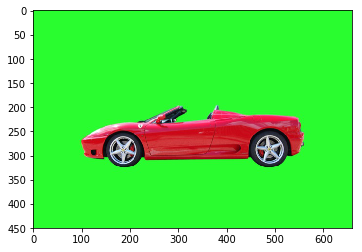

In [0]:
# Display the image
plt.imshow(image)

### Define the color threshold

In [0]:
## TODO: Define our color selection boundaries in RGB values
lower_green = np.array([0,230,0]) 
upper_green = np.array([255,255,255])


### Create a mask

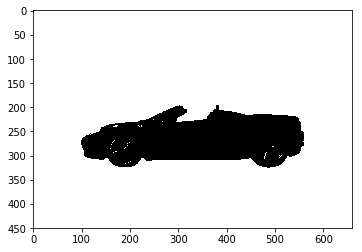

In [0]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

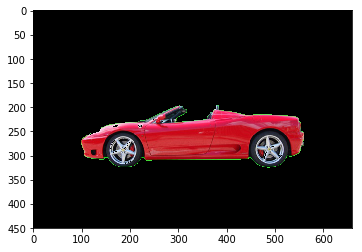

In [0]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


### Mask and add a background image

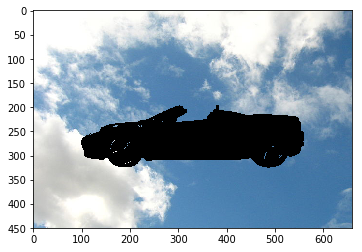

In [0]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')

## TODO: Crop it or resize the background to be the right size (450x660)
background_image = background_image[:450, :660, :]

crop_background = np.copy(background_image)
crop_background[mask == 0] = [0, 0, 0]

## TODO: Mask the cropped background so that the car area is blocked
# Hint mask the opposite area of the previous image
plt.imshow(crop_background)
## TODO: Display the background and make sure 



### Create a complete image

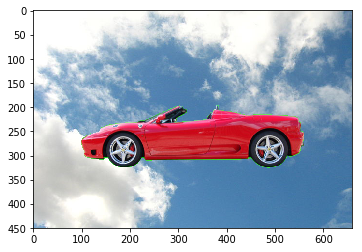

In [0]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background
complete_image = masked_image + crop_background
plt.imshow(complete_image)